In [26]:
import glob
import numpy as np
import PIL
import os
from PIL import Image
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score

In [27]:
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split

In [28]:
img_width = 150
img_height = 150
TRAIN_DIR = '../input/train/'
TEST_DIR = '../input/test/'
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [29]:
print(train_images_dogs_cats[:2])
print(len(train_images_dogs_cats))

['../input/train/cat.9491.jpg', '../input/train/cat.11613.jpg']
25000


In [30]:
print(test_images_dogs_cats[:2])
print(len(test_images_dogs_cats))

['../input/test/1523.jpg', '../input/test/2804.jpg']
12500


In [31]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [32]:
train_images_dogs_cats.sort(key=natural_keys)
test_images_dogs_cats.sort(key=natural_keys)

In [33]:
len(train_images_dogs_cats)

25000

In [34]:
train_images_dogs_cats[len(train_images_dogs_cats)-2:]

['../input/train/dog.12498.jpg', '../input/train/dog.12499.jpg']

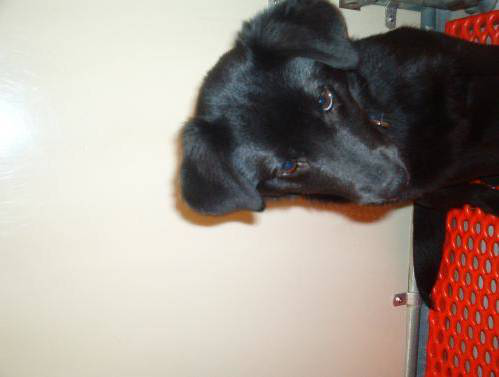

In [35]:
dog_im=Image.open("../input/train/dog.12498.jpg")
dog_im

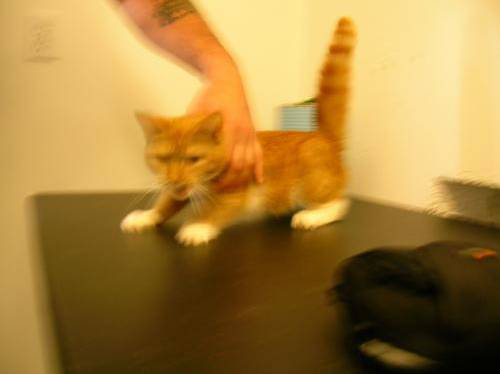

In [36]:
cat_im = Image.open("../input/train/cat.0.jpg")
#dog_im = Image.open("data/train/dog.0.jpg")
cat_im

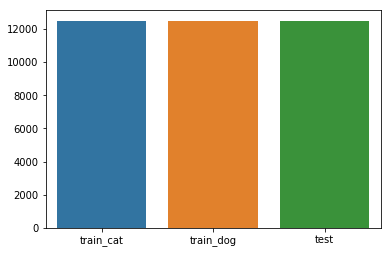

In [46]:
import seaborn as sns
cat=0
dog=0
for i in train_images_dogs_cats:
    match = re.search(r'\bcat\b',i)
    if match:
        cat+=1
    else:
        dog+=1
x = ['train_cat', 'train_dog', 'test']
y = [cat, dog, len(test_images_dogs_cats)]
ax = sns.barplot(x=x, y=y)


In [39]:
train_images_dogs_cats[0]

'../input/train/cat.0.jpg'

In [10]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
            
    return x, y

In [11]:
X, Y = prepare_data(train_images_dogs_cats)

In [12]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

In [19]:
print(X_train[0].shape)
X_train[0]

(150, 150, 3)


array([[[174, 200, 184],
        [137, 174, 154],
        [149, 202, 175],
        ...,
        [188, 200, 196],
        [181, 175, 170],
        [205, 187, 182]],

       [[160, 183, 168],
        [159, 193, 173],
        [144, 191, 165],
        ...,
        [197, 214, 209],
        [158, 161, 156],
        [161, 156, 150]],

       [[140, 160, 144],
        [181, 204, 189],
        [147, 186, 164],
        ...,
        [137, 162, 156],
        [122, 137, 130],
        [111, 123, 115]],

       ...,

       [[161, 214, 211],
        [ 89, 149, 149],
        [ 74, 141, 144],
        ...,
        [ 22,  40,  36],
        [ 75,  87,  84],
        [ 61,  69,  69]],

       [[132, 180, 167],
        [120, 175, 169],
        [121, 180, 184],
        ...,
        [ 98, 113, 108],
        [139, 148, 144],
        [ 92,  99,  96]],

       [[154, 193, 172],
        [ 82, 124, 113],
        [ 84, 131, 136],
        ...,
        [ 92, 102,  97],
        [107, 116, 109],
        [100, 107, 100]]